In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_gbq

import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
from ArapFunctions import query_table, flag_alt_products_2, grab_product_size, process_data

In [3]:
project_id = "cp-gaa-visualization-dev"

In [4]:
sql_query = """
SELECT 
  asin,
  product_title,
  n1_purchased_asin,
  n1_purchased_product_title,
  n2_purchased_asin,
  n2_purchased_product_title,
  n3_purchased_asin,
  n3_purchased_product_title,
  start_date,
  end_date,
  country
   
FROM 

  `cp-gaa-visualization-dev.arap.alternate_purchase_dly` 
  
WHERE 
  product_title LIKE "%Softsoap%"
  AND
  product_title LIKE "%Liquid Hand Soap%"
  AND
  start_date >= '2020-01-01'
"""

soft_soap_1 = query_table(sql_query)

Downloading: 100%|██████████| 6464/6464 [00:01<00:00, 4499.37rows/s]


In [5]:
#soft_soap_1 = soft_soap_1[soft_soap_1['product_title'].str.contains('Softsoap')]

In [6]:
soft_soap_1.head(3)

,asin,product_title,n1_purchased_asin,n1_purchased_product_title,n2_purchased_asin,n2_purchased_product_title,n3_purchased_asin,n3_purchased_product_title,start_date,end_date,country
0,B0752N377M,Softsoap Liquid Hand Soap Refill Lavender and ...,B004HOLDH4,Blue Diamond Almonds Roasted Salted 16 Ounce (...,B0758NHWS8,SanDisk 256GB Ultra MicroSDXC UHS-I Memory Car...,,,2020-01-06,2020-01-06,USA
1,B01N6TXTPA,Softsoap Liquid Hand Soap Cherry Blossom - 11....,B01NBYY28W,Scott 1000 Sheetsper Roll Toilet Paper Bath Ti...,B071163YYJ,Softsoap Liquid Hand Soap Cherry Blossom - 11....,081331951X,The Art of War,2020-01-06,2020-01-06,USA
2,B079FYJC97,Softsoap Liquid Hand Soap Milk and Honey - 7.5...,B01LTI988G,Softsoap Liquid Hand Soap Lavender and Chamomi...,B079FV8QB9,Softsoap Liquid Hand Soap Aloe - 7.5 fluid oun...,B00CC6XSRC,Colgate Extra Clean Full Head Toothbrush Mediu...,2020-01-06,2020-01-06,USA


In [7]:
#soft_soap_1 = soft_soap_1[soft_soap_1['product_title'].str.contains('Liquid Hand Soap')]

In [8]:
soft_soap_2 = process_data(soft_soap_1)

In [9]:
soft_soap_2.head()

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,country
0,2020-01-06,B0752N377M,Softsoap Liquid Hand Soap Refill Lavender and ...,Blue Diamond Almonds Roasted Salted 16 Ounce (...,no,no,USA
1,2020-01-06,B01N6TXTPA,Softsoap Liquid Hand Soap Cherry Blossom - 11....,Scott 1000 Sheetsper Roll Toilet Paper Bath Ti...,no,no,USA
2,2020-01-06,B079FYJC97,Softsoap Liquid Hand Soap Milk and Honey - 7.5...,Softsoap Liquid Hand Soap Lavender and Chamomi...,yes,no,USA
3,2020-01-06,B01N4NLFFN,Softsoap Liquid Hand Soap Pump Jasmine and Min...,Osteo Bi-Flex Triple Strength Coated Tablets (...,no,no,USA
4,2020-01-06,B07SK7SF85,Softsoap Liquid Hand Soap Pump Variety Pack 13...,NYX PROFESSIONAL MAKEUP Extra Creamy Round Lip...,no,no,USA


#### Pre-epidemic Period

In [10]:
pre_epidemic = soft_soap_2[soft_soap_2.start_date < '2020-01-20']

In [11]:
pre_epidemic_int = pre_epidemic[pre_epidemic.n1_internal == 'yes']

In [12]:
pre_epidemic_int.sort_values(by='start_date', ascending=True, inplace=True)

In [13]:
pre_epidemic_int.reset_index(drop=True, inplace=True)

In [14]:
# print(f'Date: {pre_epidemic_int.start_date[0]}')
# print(f'Out: {pre_epidemic_int.product_title[0]}')
# print(f'Into: {pre_epidemic_int.n1_purchased_product_title[0]}')
# print(f'Country: {pre_epidemic_int.country[0]}')

In [15]:
pre_epidemic_size = grab_product_size(pre_epidemic_int)
pre_epidemic_size.head()

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,country,viewed_size,n1_purchased_size
0,2020-01-01,B003A4HSWQ,Softsoap Moisturizing Liquid Hand Soap Refill ...,Softsoap Hand Soap Soothing Aloe Vera Moisturi...,yes,no,USA,32 fluid ounce (6 Pack),64 Fl Oz Bottle (Pack of 2)
1,2020-01-01,B07W8ZRMSJ,Softsoap Liquid Hand Soap Aquarium Bundle with...,Softsoap Liquid Hand Soap Aquarium - 7.5 Fl Oz...,yes,no,USA,NA,7.5 Fl Oz (Pack of 6)
2,2020-01-01,B01LTI9886,Softsoap Liquid Hand Soap Coconut and Warm Gin...,Softsoap Liquid Hand Soap Fresh Breeze - 7.5 f...,yes,no,USA,11.25 fluid ounce (6 Pack),7.5 fluid ounce (Pack of 6)
3,2020-01-01,B01N7E5330,Softsoap Liquid Hand Soap Pump Antibacterial F...,Softsoap Antibacterial Liquid Hand Soap Fresh ...,yes,no,USA,11.25 Ounce,11.25 fluid ounce (6 Pack)
4,2020-01-01,B003A4HSYE,Softsoap Liquid Hand Soap Refill Aquarium Seri...,Softsoap Moisturizing Liquid Hand Soap Refill ...,yes,no,USA,32 fluid ounces (6 Pack),32 fluid ounce (6 Pack)


In [16]:
pre_epidemic_size.shape

(435, 9)

In [17]:
pre_epidemic_size.country.unique()

array(['USA'], dtype=object)

#### Lockdown Period

In [18]:
pandemic_1 = soft_soap_2[soft_soap_2.start_date >= '2020-03-01']

In [19]:
pandemic_1_int = pandemic_1[pandemic_1.n1_internal == 'yes']
pandemic_1_int.sort_values(by='start_date', ascending=True, inplace=True)
pandemic_1_int.reset_index(drop=True, inplace=True)

In [20]:
pandemic_1_size = grab_product_size(pandemic_1_int)
pandemic_1_size.tail()

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,country,viewed_size,n1_purchased_size
998,2020-03-23,B081ZMZ725,Softsoap Liquid Hand Soap Aquarium 500 mL,Softsoap Liquid Hand Soap Milk & Honey 221 mL,yes,no,CANADA,500 mL,221 mL
999,2020-03-23,B081ZMZ725,Softsoap Liquid Hand Soap Aquarium 500 mL,Softsoap Liquid Hand Soap Milk & Honey 221 mL,yes,no,CANADA,500 mL,221 mL
1000,2020-03-23,B079V42QVQ,Softsoap Liquid Hand Soap Pure Zen Jasmine & W...,Softsoap Liquid Hand Soap Refill Soothing Clea...,yes,no,CANADA,332 mL,1.47 L
1001,2020-03-23,B01LTI988G,Softsoap Liquid Hand Soap Lavender and Chamomi...,Softsoap Liquid Hand Soap Pump Antibacterial C...,yes,no,USA,11.25 fluid ounces (6 Pack),11.25 Ounce
1002,2020-03-24,B00005302M,Softsoap Liquid Hand Soap Aquarium 221 mL,Softsoap Moisturizing Body Wash Blooming Jasmi...,yes,no,CANADA,221 mL,591 mL (Pack of 4)


In [21]:
pandemic_1_size.country.unique()

array(['USA', 'CANADA'], dtype=object)

#### Initial Pandemic Period

In [22]:
pandemic_2 = soft_soap_2[(soft_soap_2.start_date > '2020-01-20') & (soft_soap_2.start_date < '2020-03-01')]
pandemic_2_int = pandemic_2[pandemic_2.n1_internal == 'yes']
pandemic_2_int.sort_values(by='start_date', ascending=True, inplace=True)
pandemic_2_int.reset_index(drop=True, inplace=True)

In [23]:
pandemic_2_size = grab_product_size(pandemic_2_int)
pandemic_2_size.head()

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,country,viewed_size,n1_purchased_size
0,2020-01-21,B004NH138O,Softsoap Liquid Hand Soap Refill Cucumber and ...,Softsoap Liquid Hand Soap Refill Lavender and ...,yes,no,USA,32 Fluid Ounce (2 Pack),32 Oz
1,2020-01-21,B003A4HSYE,Softsoap Liquid Hand Soap Refill Aquarium Seri...,Softsoap Liquid Hand Soap Fresh Breeze - 7.5 f...,yes,no,USA,32 fluid ounces (6 Pack),7.5 fluid ounce (Pack of 6)
2,2020-01-21,B07SLBKBRS,Softsoap Liquid Hand Soap Pump Variety Pack - ...,Softsoap Liquid Hand Soap Aquarium - 7.5 Fl Oz...,yes,no,USA,11.25 fluid ounce (5 Pack),7.5 Fl Oz (Pack of 6)
3,2020-01-21,B07HCR1RXB,Softsoap Liquid Hand Soap Aloe - 7.5 fluid ounce,Softsoap Liquid Hand Soap Milk and Honey 7.5 O...,yes,no,USA,7.5 fluid ounce,7.5 Ounce
4,2020-01-21,B071163YYJ,Softsoap Liquid Hand Soap Cherry Blossom - 11....,Softsoap Liquid Hand Soap Coconut and Warm Gin...,yes,no,USA,11.25 fluid ounce (6 Pack),11.25 fluid ounce (6 Pack)


- Periods when things shifted more in the US
- Infection rate dataset
- Weekly or Daily

In [24]:
"\d+\.\d+|\d{1,3}"

'\\d+\\.\\d+|\\d{1,3}'

In [25]:
#soft_soap_1.sort_values(by='start_date', ascending=True, inplace=True)

In [26]:
#soft_soap_1.set_index(['start_date'], inplace=True)

#### Visualizations

In [27]:
viewed_list = pre_epidemic_size.viewed_size.unique().tolist()
purchased_list = pre_epidemic_size.n1_purchased_size.unique().tolist()

In [28]:
pre_epidemic_size.viewed_size = pre_epidemic_size.viewed_size.str.replace('2 Scent Bundle Soothing Aloe Vera and Fresh Breeze - ', "")

In [29]:
pre_epidemic_size.viewed_size.value_counts()[:11]

7.5 fluid ounce (Pack of 6)      79
11.25 fluid ounce (6 Pack)       69
NA                               27
7.5 fluid ounce (12 Pack)        20
7.5 Fl Oz (Pack of 6)            19
11.25 fluid ounce (5 Pack)       19
11.25 fluid ounce (Pack of 6)    19
11.25 Ounce                      18
56 Ounce                         17
56 fluid ounce                   15
13 fluid ounce (4 Pack)          14
Name: viewed_size, dtype: int64

In [31]:
from ArapFunctions import show_products, show_products_2

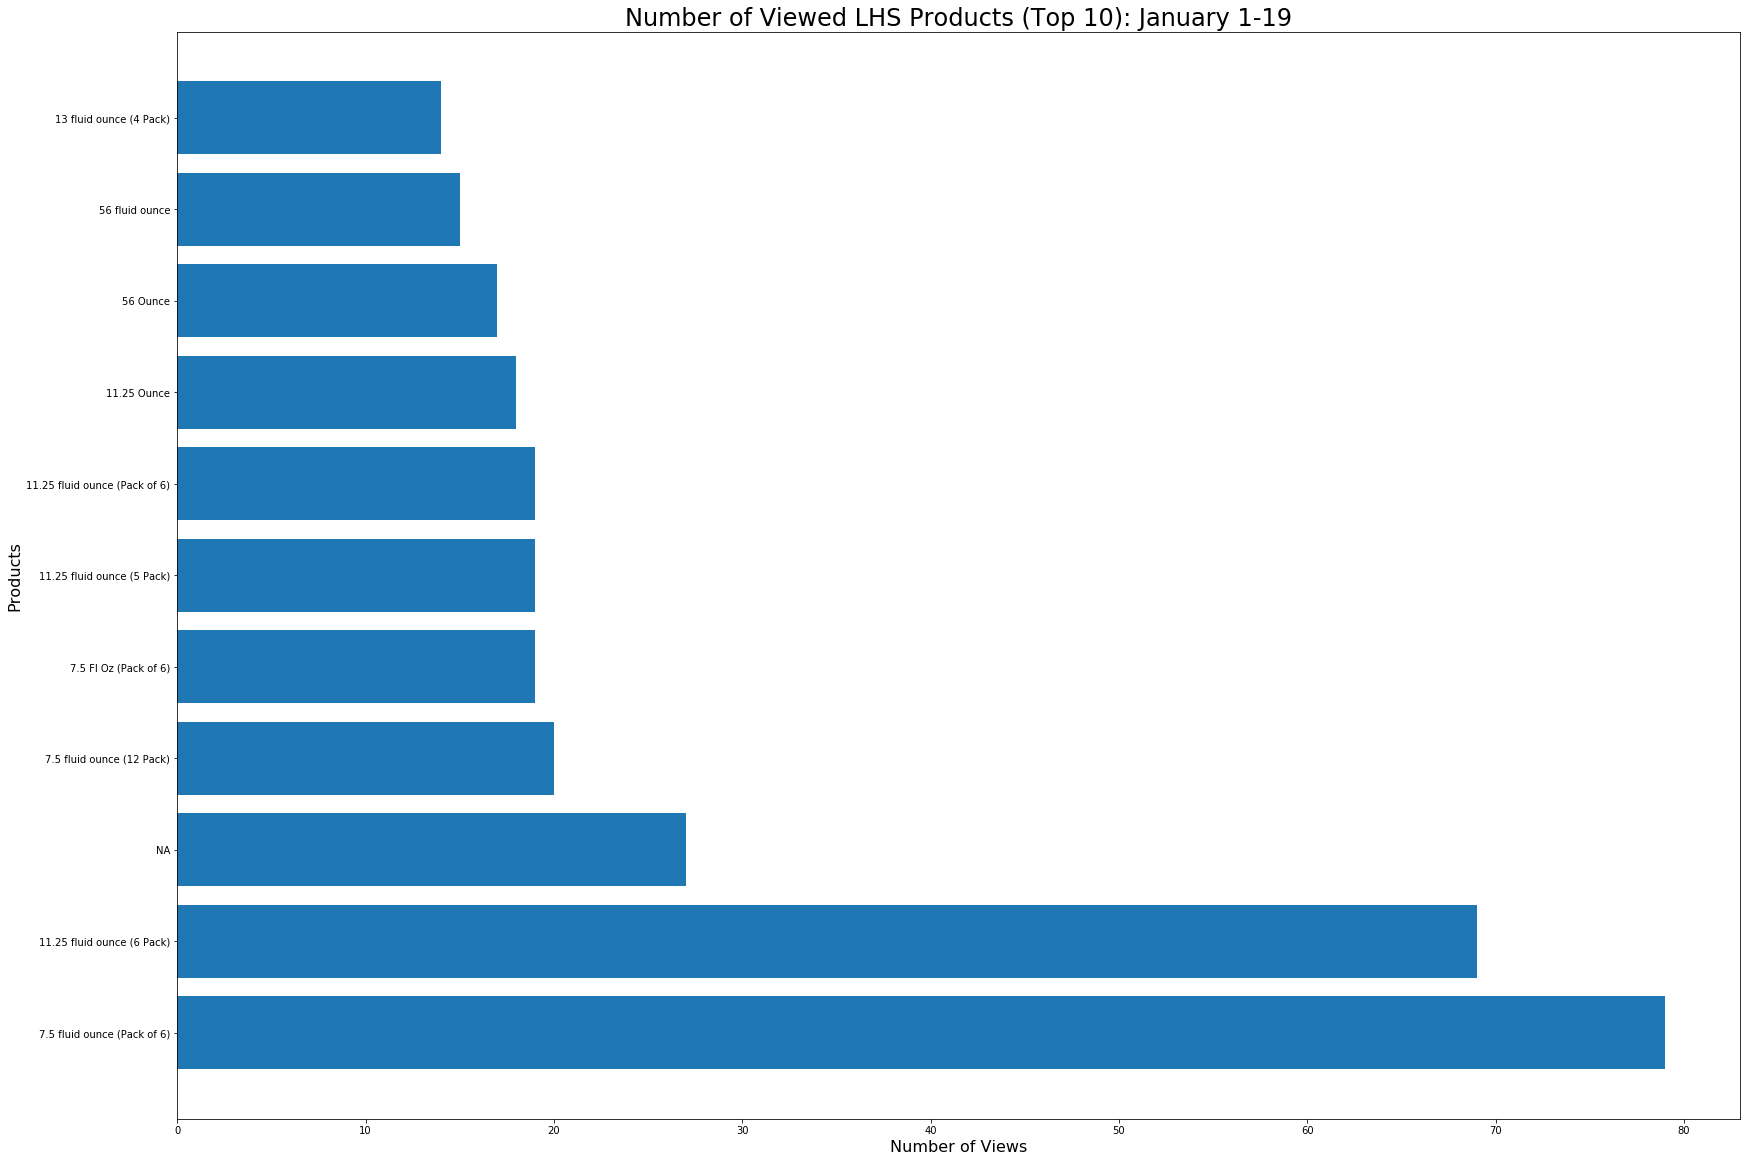

In [33]:
show_products(pre_epidemic_size.viewed_size, 
              title='Number of Viewed LHS Products (Top 10)', 
             date='January 1-19')

In [34]:
pandemic_2_size.viewed_size = pandemic_2_size.viewed_size.str.replace('2 Scent Bundle Soothing Aloe Vera and Fresh Breeze - ', "")

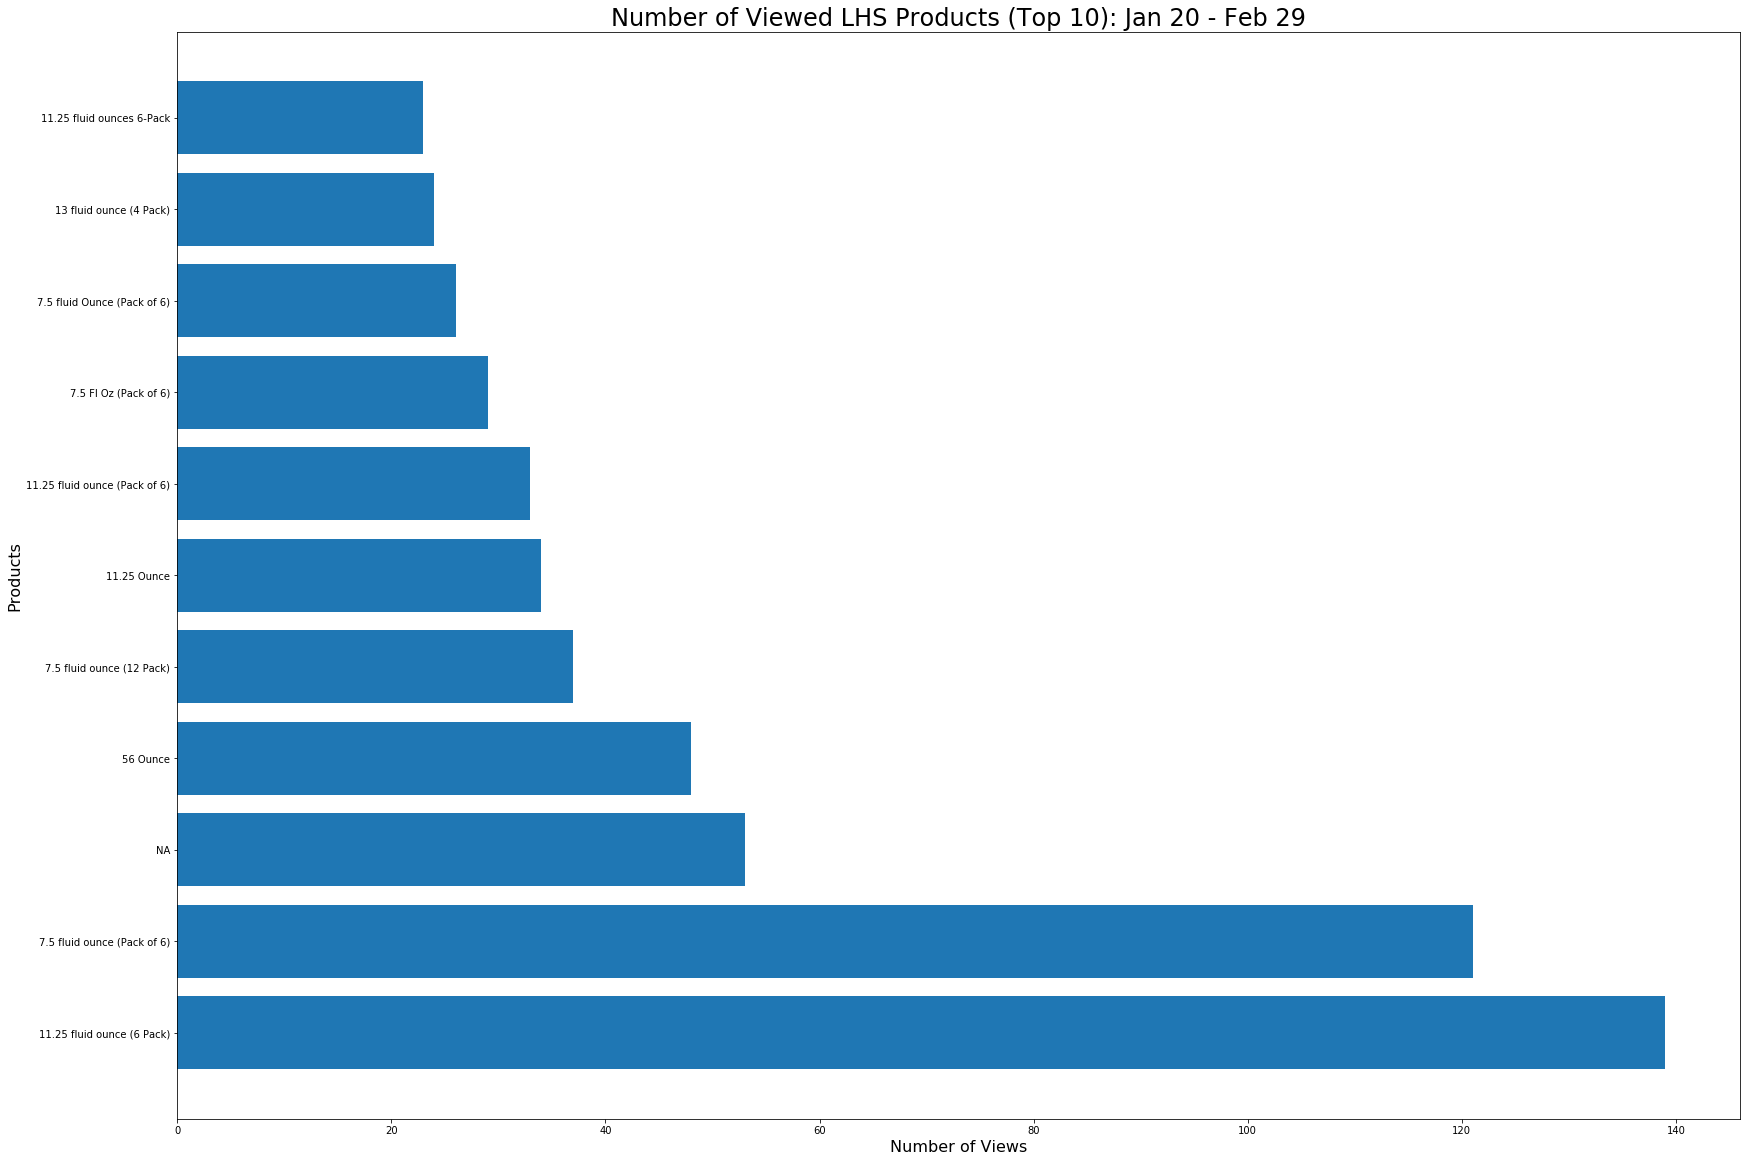

In [35]:
show_products(pandemic_2_size.viewed_size, 
              title='Number of Viewed LHS Products (Top 10)', 
             date='Jan 20 - Feb 29')

In [36]:
pandemic_1_size.viewed_size = pandemic_1_size.viewed_size.str.replace('2 Scent Bundle Soothing Aloe Vera and Fresh Breeze - ', "")

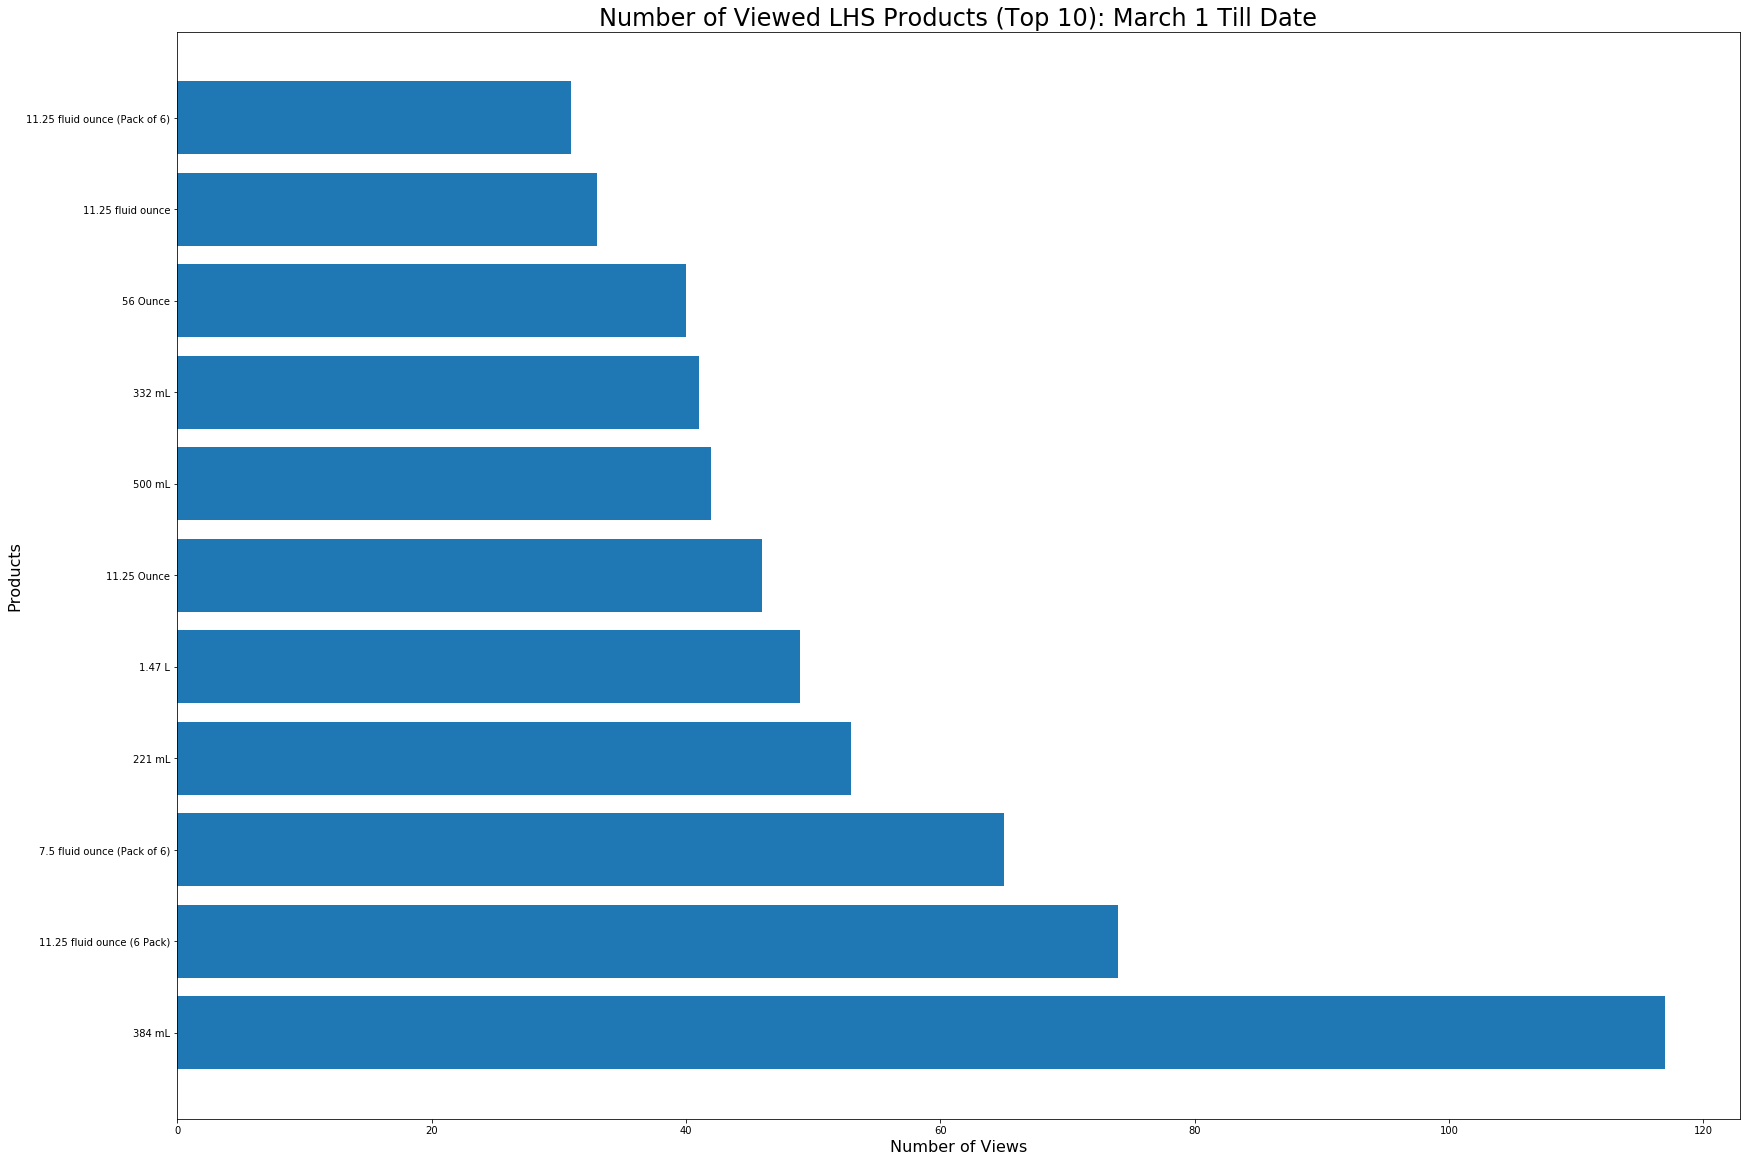

In [37]:
show_products(pandemic_1_size.viewed_size, 
              title='Number of Viewed LHS Products (Top 10)', 
             date='March 1 Till Date')

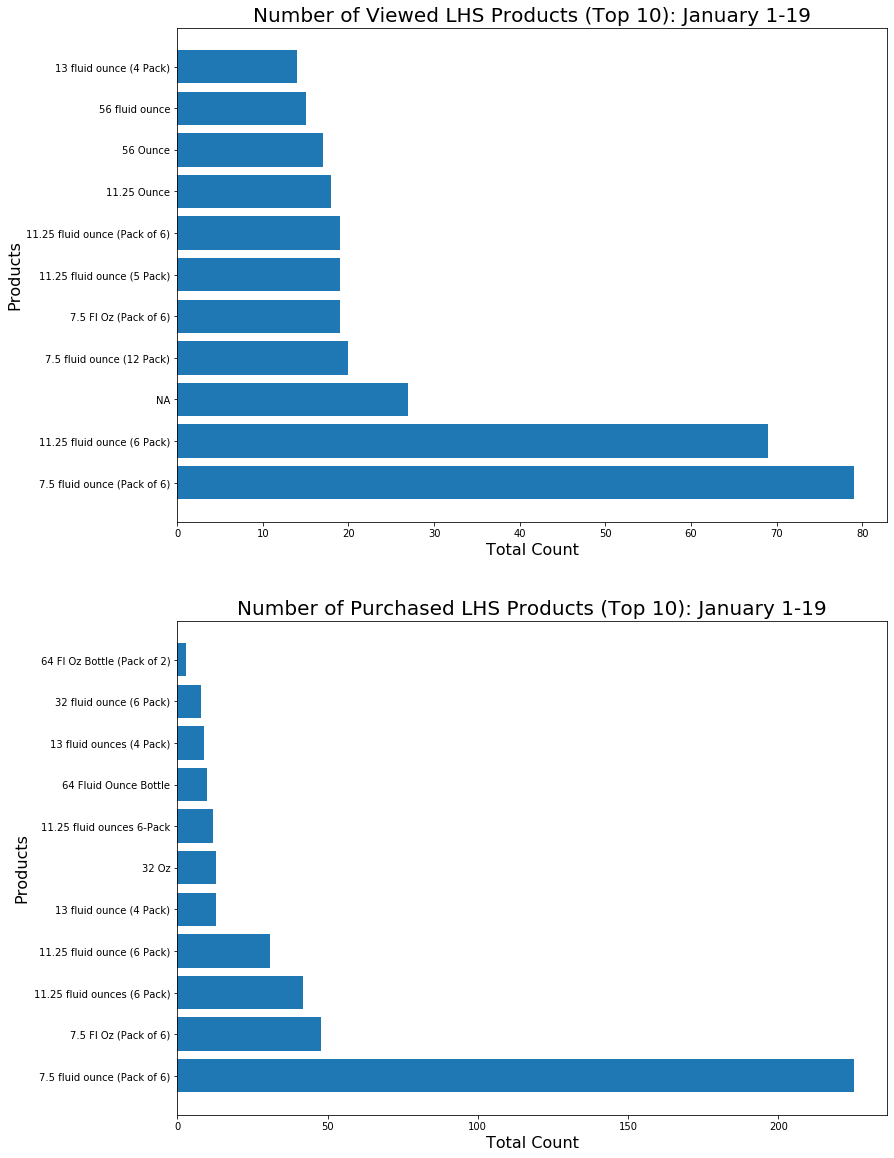

In [38]:
show_products_2(pre_epidemic_size, 
               title1='Number of Viewed LHS Products (Top 10)', 
               title2='Number of Purchased LHS Products (Top 10)',
               date='January 1-19')

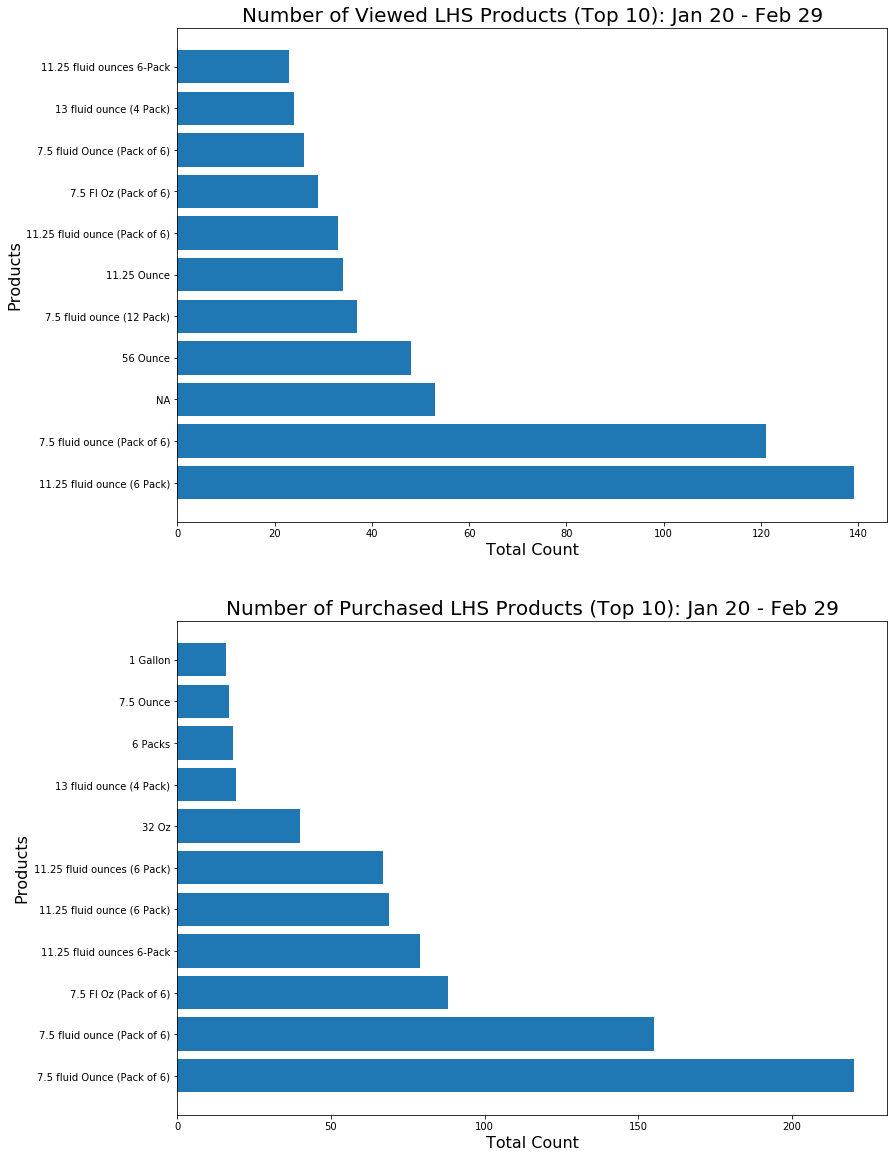

In [40]:
show_products_2(pandemic_2_size, 
               title1='Number of Viewed LHS Products (Top 10)', 
               title2='Number of Purchased LHS Products (Top 10)',
               date='Jan 20 - Feb 29')

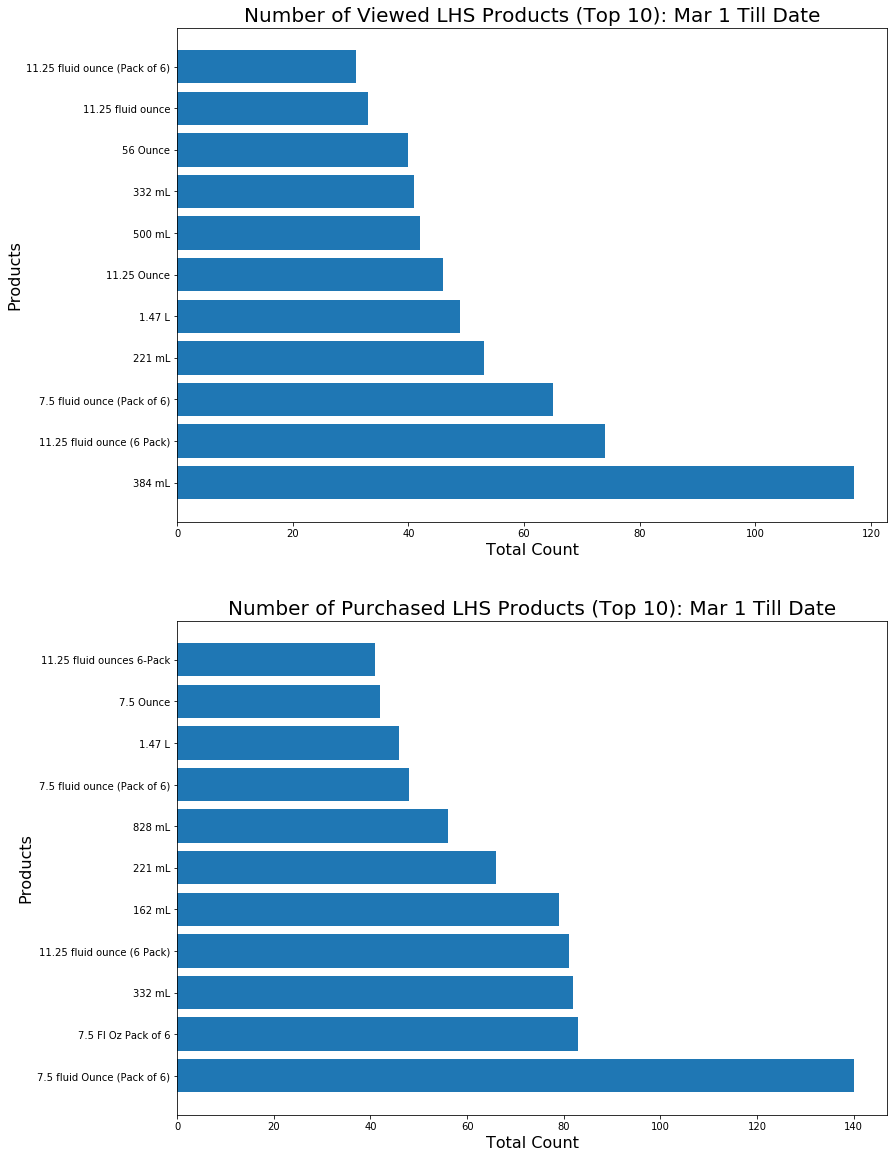

In [41]:
show_products_2(pandemic_1_size, 
               title1='Number of Viewed LHS Products (Top 10)', 
               title2='Number of Purchased LHS Products (Top 10)',
               date='Mar 1 Till Date')

### Upload to BigQuery

In [43]:
pre_epidemic_size.to_gbq(destination_table= 'arap_analytics.alt_purchase_behavior_jan_01_19', 
                   project_id=project_id, if_exists='replace')

1it [00:03,  3.64s/it]


In [ ]:
pandemic_2_size.to_gbq(destination_table= 'arap_analytics.alt_purchase_behavior_jan_20_feb_29', 
                   project_id=project_id)

In [ ]:
pandemic_1_size.to_gbq(destination_table= 'arap_analytics.alt_purchase_behavior_mar_01_till_date', 
                   project_id=project_id)